In [3]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fireducks.pandas as pd

In [5]:
df = pd.read_csv('../kdd2004.csv')

In [6]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', 'target'],
      dtype='object')

In [7]:
df.target.unique()

array([-1,  1])

In [9]:
df.target = df.target.map({-1:0, 1:1})
df.target.unique()

array([0, 1])

In [16]:
df.target.value_counts(normalize=True)

target
0    0.991108
1    0.008892
Name: proportion, dtype: float64

In [11]:
X = df.drop('target', axis=1)
X.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73'],
      dtype='object')

In [12]:
y = df.target
y.unique()

array([0, 1])

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((102025, 74), (102025,), (43726, 74), (43726,))

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2, n_jobs=-1, random_state=0)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, n_jobs=-1, random_state=0)

In [21]:
y_train_rf = rf.predict_proba(X_train)[:,1]
y_test_rf = rf.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression(max_iter=1000, random_state=0)
lr.fit(X_train, y_train)

/home/max/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=0)

In [22]:
y_train_lr = lr.predict_proba(X_train)[:,1]
y_test_lr = lr.predict_proba(X_test)[:,1]

# Precision-Recall Curve Plot

In [23]:
import sklearn.metrics

In [24]:
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_log_loss_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_sco

In [25]:
from sklearn.metrics import PrecisionRecallDisplay

In [26]:
?PrecisionRecallDisplay

Init signature:
PrecisionRecallDisplay(
    precision,
    recall,
    *,
    average_precision=None,
    estimator_name=None,
    pos_label=None,
    prevalence_pos_label=None,
)
Docstring:     
Precision Recall visualization.

It is recommend to use
:func:`~sklearn.metrics.PrecisionRecallDisplay.from_estimator` or
:func:`~sklearn.metrics.PrecisionRecallDisplay.from_predictions` to create
a :class:`~sklearn.metrics.PrecisionRecallDisplay`. All parameters are
stored as attributes.

Read more in the :ref:`User Guide <visualizations>`.

Parameters
----------
precision : ndarray
    Precision values.

recall : ndarray
    Recall values.

average_precision : float, default=None
    Average precision. If None, the average precision is not shown.

estimator_name : str, default=None
    Name of estimator. If None, then the estimator name is not shown.

pos_label : int, float, bool or str, default=None
    The class considered as the positive class. If None, the class will not
    be shown in 

In [27]:
help(PrecisionRecallDisplay)

Help on class PrecisionRecallDisplay in module sklearn.metrics._plot.precision_recall_curve:

class PrecisionRecallDisplay(sklearn.utils._plotting._BinaryClassifierCurveDisplayMixin)
 |  PrecisionRecallDisplay(precision, recall, *, average_precision=None, estimator_name=None, pos_label=None, prevalence_pos_label=None)
 |  
 |  Precision Recall visualization.
 |  
 |  It is recommend to use
 |  :func:`~sklearn.metrics.PrecisionRecallDisplay.from_estimator` or
 |  :func:`~sklearn.metrics.PrecisionRecallDisplay.from_predictions` to create
 |  a :class:`~sklearn.metrics.PrecisionRecallDisplay`. All parameters are
 |  stored as attributes.
 |  
 |  Read more in the :ref:`User Guide <visualizations>`.
 |  
 |  Parameters
 |  ----------
 |  precision : ndarray
 |      Precision values.
 |  
 |  recall : ndarray
 |      Recall values.
 |  
 |  average_precision : float, default=None
 |      Average precision. If None, the average precision is not shown.
 |  
 |  estimator_name : str, default=N

In [28]:
dir(PrecisionRecallDisplay)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_validate_and_get_response_values',
 '_validate_from_predictions_params',
 '_validate_plot_params',
 'from_estimator',
 'from_predictions',
 'plot']

In [30]:
?PrecisionRecallDisplay.from_estimator

Signature:
PrecisionRecallDisplay.from_estimator(
    estimator,
    X,
    y,
    *,
    sample_weight=None,
    pos_label=None,
    drop_intermediate=False,
    response_method='auto',
    name=None,
    ax=None,
    plot_chance_level=False,
    chance_level_kw=None,
    despine=False,
    **kwargs,
)
Docstring:
Plot precision-recall curve given an estimator and some data.

Parameters
----------
estimator : estimator instance
    Fitted classifier or a fitted :class:`~sklearn.pipeline.Pipeline`
    in which the last estimator is a classifier.

X : {array-like, sparse matrix} of shape (n_samples, n_features)
    Input values.

y : array-like of shape (n_samples,)
    Target values.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

pos_label : int, float, bool or str, default=None
    The class considered as the positive class when computing the
    precision and recall metrics. By default, `estimators.classes_[1]`
    is considered as the positive cl

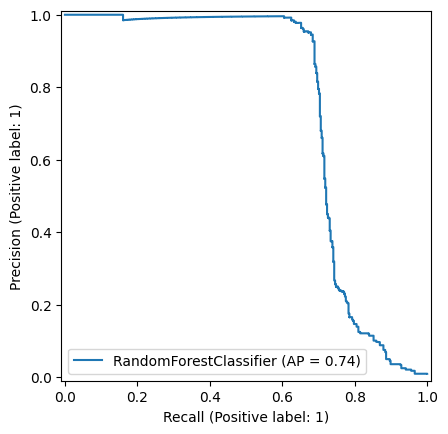

In [31]:
PrecisionRecallDisplay.from_estimator(rf, X_test, y_test)

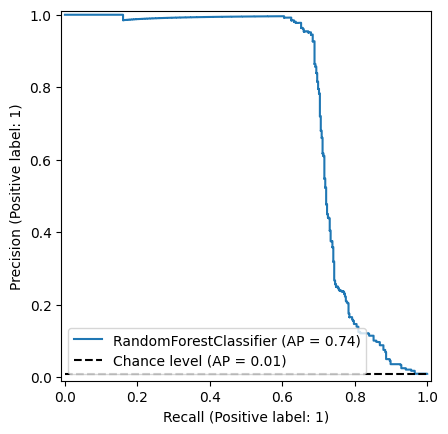

In [ ]:
rf_disp = PrecisionRecallDisplay.from_estimator(rf, X_test, y_test, plot_chance_level=True)


In [34]:
dir(rf_disp)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_validate_and_get_response_values',
 '_validate_from_predictions_params',
 '_validate_plot_params',
 'average_precision',
 'ax_',
 'chance_level_',
 'estimator_name',
 'figure_',
 'from_estimator',
 'from_predictions',
 'line_',
 'plot',
 'pos_label',
 'precision',
 'prevalence_pos_label',
 'recall']

In [35]:
help(rf_disp)

Help on PrecisionRecallDisplay in module sklearn.metrics._plot.precision_recall_curve object:

class PrecisionRecallDisplay(sklearn.utils._plotting._BinaryClassifierCurveDisplayMixin)
 |  PrecisionRecallDisplay(precision, recall, *, average_precision=None, estimator_name=None, pos_label=None, prevalence_pos_label=None)
 |  
 |  Precision Recall visualization.
 |  
 |  It is recommend to use
 |  :func:`~sklearn.metrics.PrecisionRecallDisplay.from_estimator` or
 |  :func:`~sklearn.metrics.PrecisionRecallDisplay.from_predictions` to create
 |  a :class:`~sklearn.metrics.PrecisionRecallDisplay`. All parameters are
 |  stored as attributes.
 |  
 |  Read more in the :ref:`User Guide <visualizations>`.
 |  
 |  Parameters
 |  ----------
 |  precision : ndarray
 |      Precision values.
 |  
 |  recall : ndarray
 |      Recall values.
 |  
 |  average_precision : float, default=None
 |      Average precision. If None, the average precision is not shown.
 |  
 |  estimator_name : str, default=

In [36]:
dir(rf_disp.ax_)

['ArtistList',
 '_AxesBase__clear',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autotitlepos',
 '_axes',
 '_axes_locator',
 '_axis_map',
 '_axis_names',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_children',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_colorbars',
 '_convert_dx',
 '_current_image',
 '_different_canvas',
 '_errorevery_to_mask',
 '_facecolor',
 '_fill_between_process_units',
 '_fill_between_x_or_y',
 '_forward_navigation_events',
 '_

In [38]:
_ = rf_disp.ax_.set_title("2-Class Precision-Recall Curve")

Text(0.5, 1.0, '2-Class Precision-Recall Curve')

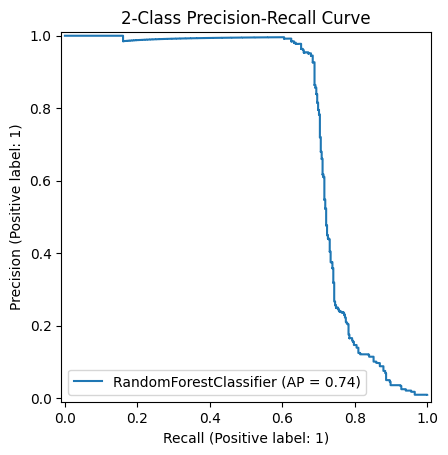

In [42]:
rf_disp.plot()
rf_disp.ax_.set_title("2-Class Precision-Recall Curve")

In [43]:
?PrecisionRecallDisplay.from_estimator

Signature:
PrecisionRecallDisplay.from_estimator(
    estimator,
    X,
    y,
    *,
    sample_weight=None,
    pos_label=None,
    drop_intermediate=False,
    response_method='auto',
    name=None,
    ax=None,
    plot_chance_level=False,
    chance_level_kw=None,
    despine=False,
    **kwargs,
)
Docstring:
Plot precision-recall curve given an estimator and some data.

Parameters
----------
estimator : estimator instance
    Fitted classifier or a fitted :class:`~sklearn.pipeline.Pipeline`
    in which the last estimator is a classifier.

X : {array-like, sparse matrix} of shape (n_samples, n_features)
    Input values.

y : array-like of shape (n_samples,)
    Target values.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

pos_label : int, float, bool or str, default=None
    The class considered as the positive class when computing the
    precision and recall metrics. By default, `estimators.classes_[1]`
    is considered as the positive cl

In [50]:
?lr_disp.ax_.set_title

Signature:
lr_disp.ax_.set_title(
    label,
    fontdict=None,
    loc=None,
    pad=None,
    *,
    y=None,
    **kwargs,
)
Docstring:
Set a title for the Axes.

Set one of the three available Axes titles. The available titles
are positioned above the Axes in the center, flush with the left
edge, and flush with the right edge.

Parameters
----------
label : str
    Text to use for the title

fontdict : dict

    .. admonition:: Discouraged

       The use of *fontdict* is discouraged. Parameters should be passed as
       individual keyword arguments or using dictionary-unpacking
       ``set_title(..., **fontdict)``.

    A dictionary controlling the appearance of the title text,
    the default *fontdict* is::

       {'fontsize': rcParams['axes.titlesize'],
        'fontweight': rcParams['axes.titleweight'],
        'color': rcParams['axes.titlecolor'],
        'verticalalignment': 'baseline',
        'horizontalalignment': loc}

loc : {'center', 'left', 'right'}, default: :rc:`a

Text(0.5, 1.0, '2-Class Precision-Recall Curve')

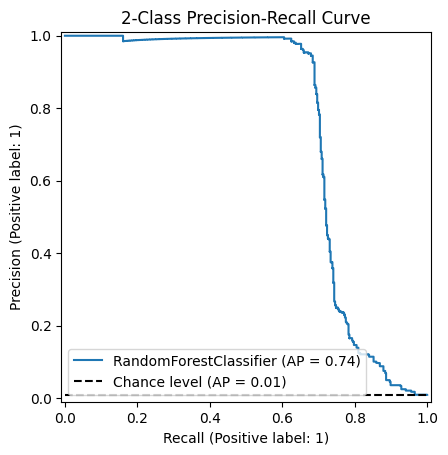

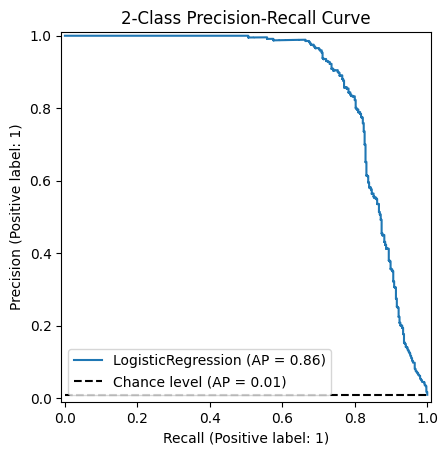

In [52]:
rf_disp=PrecisionRecallDisplay.from_estimator(rf, X_test, y_test, plot_chance_level=True)
rf_disp.ax_.set_title('2-Class Precision-Recall Curve')

lr_disp = PrecisionRecallDisplay.from_estimator(lr, X_test, y_test, plot_chance_level = True)
lr_disp.ax_.set_title("2-Class Precision-Recall Curve")



In [54]:
?rf_disp.plot

Signature:
rf_disp.plot(
    ax=None,
    *,
    name=None,
    plot_chance_level=False,
    chance_level_kw=None,
    despine=False,
    **kwargs,
)
Docstring:
Plot visualization.

Extra keyword arguments will be passed to matplotlib's `plot`.

Parameters
----------
ax : Matplotlib Axes, default=None
    Axes object to plot on. If `None`, a new figure and axes is
    created.

name : str, default=None
    Name of precision recall curve for labeling. If `None`, use
    `estimator_name` if not `None`, otherwise no labeling is shown.

plot_chance_level : bool, default=False
    Whether to plot the chance level. The chance level is the prevalence
    of the positive label computed from the data passed during
    :meth:`from_estimator` or :meth:`from_predictions` call.

    .. versionadded:: 1.3

chance_level_kw : dict, default=None
    Keyword arguments to be passed to matplotlib's `plot` for rendering
    the chance level line.

    .. versionadded:: 1.3

despine : bool, default=False
  

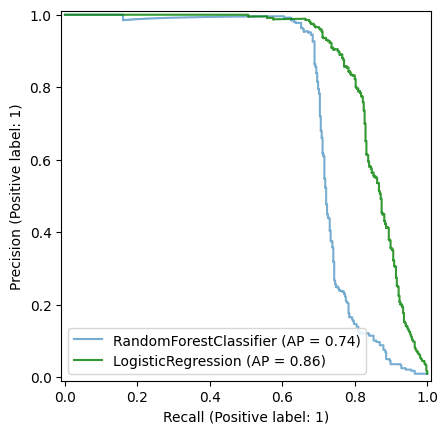

In [56]:
ax = plt.gca()
rf_disp.plot(ax=ax, alpha=0.6)
lr_disp.plot(ax=ax, alpha=0.8, c='green')

# Area Under The Curve

In [57]:
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_log_loss_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_sco

In [58]:
from sklearn.metrics import precision_recall_curve

In [59]:
?precision_recall_curve

Signature:
precision_recall_curve(
    y_true,
    y_score=None,
    *,
    pos_label=None,
    sample_weight=None,
    drop_intermediate=False,
    probas_pred='deprecated',
)
Docstring:
Compute precision-recall pairs for different probability thresholds.

Note: this implementation is restricted to the binary classification task.

The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
true positives and ``fp`` the number of false positives. The precision is
intuitively the ability of the classifier not to label as positive a sample
that is negative.

The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
true positives and ``fn`` the number of false negatives. The recall is
intuitively the ability of the classifier to find all the positive samples.

The last precision and recall values are 1. and 0. respectively and do not
have a corresponding threshold. This ensures that the graph starts on the
y axis.

The first precision and recall values are 

In [60]:
y_test_rf[:5]

array([0.0037091 , 0.00355334, 0.50609821, 0.00355334, 0.00366222])

In [61]:
precision, recall, thresholds = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1])

In [62]:
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_log_loss_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_sco

In [63]:
from sklearn.metrics import auc

In [64]:
?auc

Signature: auc(x, y)
Docstring:
Compute Area Under the Curve (AUC) using the trapezoidal rule.

This is a general function, given points on a curve.  For computing the
area under the ROC-curve, see :func:`roc_auc_score`.  For an alternative
way to summarize a precision-recall curve, see
:func:`average_precision_score`.

Parameters
----------
x : array-like of shape (n,)
    X coordinates. These must be either monotonic increasing or monotonic
    decreasing.
y : array-like of shape (n,)
    Y coordinates.

Returns
-------
auc : float
    Area Under the Curve.

See Also
--------
roc_auc_score : Compute the area under the ROC curve.
average_precision_score : Compute average precision from prediction scores.
precision_recall_curve : Compute precision-recall pairs for different
    probability thresholds.

Examples
--------
>>> import numpy as np
>>> from sklearn import metrics
>>> y = np.array([1, 1, 2, 2])
>>> pred = np.array([0.1, 0.4, 0.35, 0.8])
>>> fpr, tpr, thresholds = metrics.roc_

In [68]:
auc_rf = auc(recall, precision)

In [ ]:
# auc(precision, recall)

ValueError: x is neither increasing nor decreasing : [0.00926222 0.00926244 0.00926455 ... 1.         1.         1.        ].

In [70]:
?precision_recall_curve

Signature:
precision_recall_curve(
    y_true,
    y_score=None,
    *,
    pos_label=None,
    sample_weight=None,
    drop_intermediate=False,
    probas_pred='deprecated',
)
Docstring:
Compute precision-recall pairs for different probability thresholds.

Note: this implementation is restricted to the binary classification task.

The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
true positives and ``fp`` the number of false positives. The precision is
intuitively the ability of the classifier not to label as positive a sample
that is negative.

The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
true positives and ``fn`` the number of false negatives. The recall is
intuitively the ability of the classifier to find all the positive samples.

The last precision and recall values are 1. and 0. respectively and do not
have a corresponding threshold. This ensures that the graph starts on the
y axis.

The first precision and recall values are 

In [72]:
precision, recall, thresholds = precision_recall_curve(y_test, lr.predict_proba(X_test)[:,1])

In [74]:
auc_lr = auc(recall, precision)
auc_lr

np.float64(0.8611325972524583)

In [ ]:
# auc(precision, recall)

ValueError: x is neither increasing nor decreasing : [0.00926222 0.00926244 0.00926265 ... 1.         1.         1.        ].

In [77]:
print(f"""
Area under the Precision-Recall Curve RF: {auc_rf}
Area under the Precision-Recall Curve LR: {auc_lr}
      """)


Area under the Precision-Recall Curve RF: 0.7401576639740494
Area under the Precision-Recall Curve LR: 0.8611325972524583
      


# Average Precision Score

In [78]:
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_log_loss_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_sco

In [79]:
from sklearn.metrics import average_precision_score

In [80]:
?average_precision_score

Signature:
average_precision_score(
    y_true,
    y_score,
    *,
    average='macro',
    pos_label=1,
    sample_weight=None,
)
Docstring:
Compute average precision (AP) from prediction scores.

AP summarizes a precision-recall curve as the weighted mean of precisions
achieved at each threshold, with the increase in recall from the previous
threshold used as the weight:

.. math::
    \text{AP} = \sum_n (R_n - R_{n-1}) P_n

where :math:`P_n` and :math:`R_n` are the precision and recall at the nth
threshold [1]_. This implementation is not interpolated and is different
from computing the area under the precision-recall curve with the
trapezoidal rule, which uses linear interpolation and can be too
optimistic.

Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.

Parameters
----------
y_true : array-like of shape (n_samples,) or (n_samples, n_classes)
    True binary labels or binary label indicators.

y_score : array-like of shape (n_samples,) or (n_samples, n_c

In [81]:
average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])

np.float64(0.7394961041800687)

In [82]:
average_precision_score(y_test, rf.predict(X_test))

np.float64(0.5939072007718462)

In [84]:
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:,1])
ap_lr = average_precision_score(y_test, lr.predict_proba(X_test)[:,1])

print(f"""
      Average precision rf: {ap_rf}
Average precision lr: {ap_lr}
      """)


      Average precision rf: 0.7394961041800687
Average precision lr: 0.8612044120913399
      


# Yellowbrick

In [85]:
import yellowbrick.classifier

In [86]:
dir(yellowbrick.classifier)

['ClassBalance',
 'ClassPredictionError',
 'ClassificationReport',
 'ClassificationScoreVisualizer',
 'ConfusionMatrix',
 'DiscriminationThreshold',
 'PRCurve',
 'PrecisionRecallCurve',
 'ROCAUC',
 'ScoreVisualizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'base',
 'class_balance',
 'class_prediction_error',
 'classification_report',
 'confusion_matrix',
 'discrimination_threshold',
 'prcurve',
 'precision_recall_curve',
 'roc_auc',
 'rocauc',
 'threshold']

In [88]:
from yellowbrick.classifier import PrecisionRecallCurve

In [89]:
?PrecisionRecallCurve

Init signature:
PrecisionRecallCurve(
    estimator,
    ax=None,
    classes=None,
    colors=None,
    cmap=None,
    encoder=None,
    fill_area=True,
    ap_score=True,
    micro=True,
    iso_f1_curves=False,
    iso_f1_values=(0.2, 0.4, 0.6, 0.8),
    per_class=False,
    fill_opacity=0.2,
    line_opacity=0.8,
    is_fitted='auto',
    force_model=False,
    **kwargs,
)
Docstring:     
Precision-Recall curves are a metric used to evaluate a classifier's quality,
particularly when classes are very imbalanced. The precision-recall curve
shows the tradeoff between precision, a measure of result relevancy, and
recall, a measure of completeness. For each class, precision is defined as
the ratio of true positives to the sum of true and false positives, and
recall is the ratio of true positives to the sum of true positives and false
negatives.

A large area under the curve represents both high recall and precision, the
best case scenario for a classifier, showing a model that returns a

In [93]:
?plt.rcParams

Type:        RcParams
String form:
_internal.classic_mode: False
           agg.path.chunksize: 0
           animation.bitrate: -1
           animation.codec: h264
           a <...> : True
           ytick.minor.size: 0.0
           ytick.minor.visible: False
           ytick.minor.width: 0.5
           ytick.right: False
Length:      322
File:        ~/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/matplotlib/__init__.py
Docstring:  
A dict-like key-value store for config parameters, including validation.

Validating functions are defined and associated with rc parameters in
:mod:`matplotlib.rcsetup`.

The list of rcParams is:

- _internal.classic_mode
- agg.path.chunksize
- animation.bitrate
- animation.codec
- animation.convert_args
- animation.convert_path
- animation.embed_limit
- animation.ffmpeg_args
- animation.ffmpeg_path
- animation.frame_format
- animation.html
- animation.writer
- axes.autolimit_mode
- axes.axisbelow
- axes.edgecolor
- axes

In [94]:
?plt.rcParams['font.family']

Object `plt.rcParams['font.family']` not found.


In [95]:
plt.rcParams['font.family'] = 'DejaVu Sans'

In [97]:
dir(PrecisionRecallCurve)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_decode_labels',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_draw_ap_score',
 '_draw_binary',
 '_draw_multiclass',
 '_draw_pr_curve',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_get_y_scores',
 '_labels',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'ax',
 'class_colors_',
 'draw',
 

In [98]:
?PrecisionRecallCurve.score

Signature: PrecisionRecallCurve.score(self, X, y)
Docstring:
Generates the Precision-Recall curve on the specified test data.

Returns
-------
score_ : float
    Average precision, a summary of the plot as a weighted mean of
    precision at each threshold, weighted by the increase in recall from
    the previous threshold.
File:      ~/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/yellowbrick/classifier/prcurve.py
Type:      function

/home/max/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


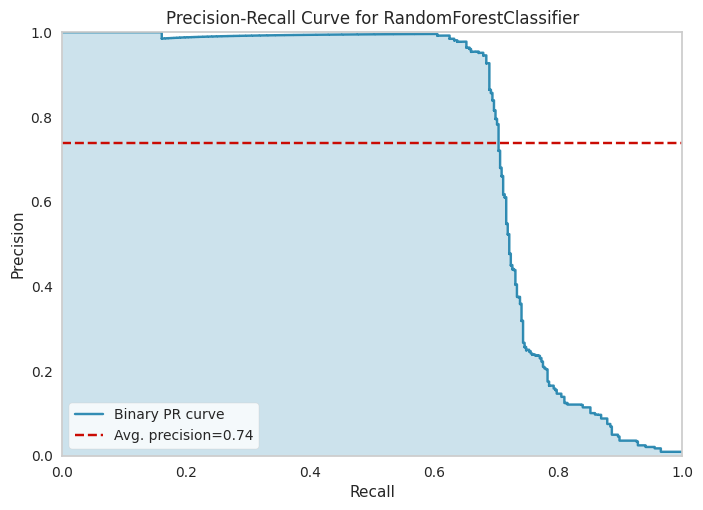

<Axes: title={'center': 'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [99]:
visualizer = PrecisionRecallCurve(rf, classes=[0,1])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [100]:
dir(yellowbrick.classifier)

['ClassBalance',
 'ClassPredictionError',
 'ClassificationReport',
 'ClassificationScoreVisualizer',
 'ConfusionMatrix',
 'DiscriminationThreshold',
 'PRCurve',
 'PrecisionRecallCurve',
 'ROCAUC',
 'ScoreVisualizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'base',
 'class_balance',
 'class_prediction_error',
 'classification_report',
 'confusion_matrix',
 'discrimination_threshold',
 'prcurve',
 'precision_recall_curve',
 'roc_auc',
 'rocauc',
 'threshold']

In [102]:
?PrecisionRecallCurve

Init signature:
PrecisionRecallCurve(
    estimator,
    ax=None,
    classes=None,
    colors=None,
    cmap=None,
    encoder=None,
    fill_area=True,
    ap_score=True,
    micro=True,
    iso_f1_curves=False,
    iso_f1_values=(0.2, 0.4, 0.6, 0.8),
    per_class=False,
    fill_opacity=0.2,
    line_opacity=0.8,
    is_fitted='auto',
    force_model=False,
    **kwargs,
)
Docstring:     
Precision-Recall curves are a metric used to evaluate a classifier's quality,
particularly when classes are very imbalanced. The precision-recall curve
shows the tradeoff between precision, a measure of result relevancy, and
recall, a measure of completeness. For each class, precision is defined as
the ratio of true positives to the sum of true and false positives, and
recall is the ratio of true positives to the sum of true positives and false
negatives.

A large area under the curve represents both high recall and precision, the
best case scenario for a classifier, showing a model that returns a

/home/max/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


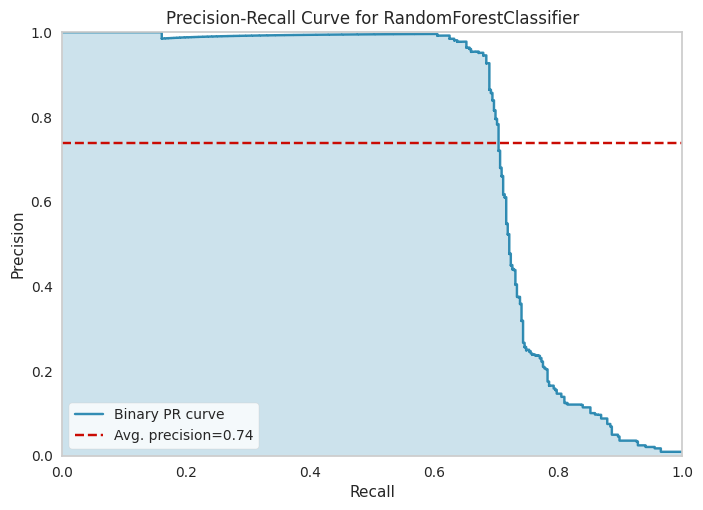

/home/max/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


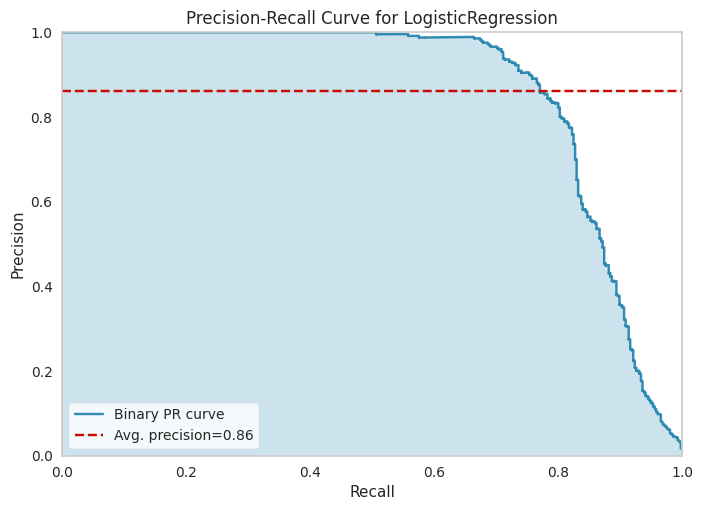

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [104]:
visualizer_rf = PrecisionRecallCurve(rf, classes=[0,1])
visualizer_rf.fit(X_train, y_train)
visualizer_rf.score(X_test, y_test)
visualizer_rf.show()

visualizer_lr = PrecisionRecallCurve(lr, classes=[0,1])
visualizer_lr.fit(X_train, y_train)
visualizer_lr.score(X_test, y_test)
visualizer_lr.show()